In [39]:
import numpy as np
import pandas as pd
from tueplots import bundles
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.rcParams.update({"figure.dpi": 1000, "font.family": "Nimbus Roman"})

import matplotlib.font_manager as fm

# Get list of available fonts
available_fonts = [f.name for f in fm.fontManager.ttflist]


print(available_fonts)


['STIXNonUnicode', 'DejaVu Serif', 'cmsy10', 'STIXSizeOneSym', 'STIXSizeTwoSym', 'STIXNonUnicode', 'cmtt10', 'STIXSizeThreeSym', 'DejaVu Serif', 'DejaVu Sans Mono', 'cmmi10', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'STIXSizeTwoSym', 'STIXNonUnicode', 'DejaVu Serif Display', 'STIXSizeThreeSym', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXGeneral', 'cmr10', 'STIXSizeOneSym', 'cmb10', 'DejaVu Sans', 'cmss10', 'cmex10', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'DejaVu Serif', 'STIXNonUnicode', 'DejaVu Sans Display', 'STIXGeneral', 'STIXGeneral', 'DejaVu Sans', 'Carlito', 'Loma', 'AnjaliOldLipi', 'Noto Serif CJK JP', 'Liberation Sans Narrow', 'Liberation Mono', 'KacstPen', 'Gayathri', 'Tlwg Mono', 'Yrsa', 'Navilu', 'URW Bookman', 'KacstTitle', 'Liberation Sans', 'Khmer OS', 'Timmana', 'Yrsa', 'Sree Krushnadevaraya', 'C059', 'Liberation Mono', 'Samanata', 'ori1Uni', 'FreeMono', 'Ramabhadra', 'Liberation Serif', 'Tlwg Typewriter', 'Rob

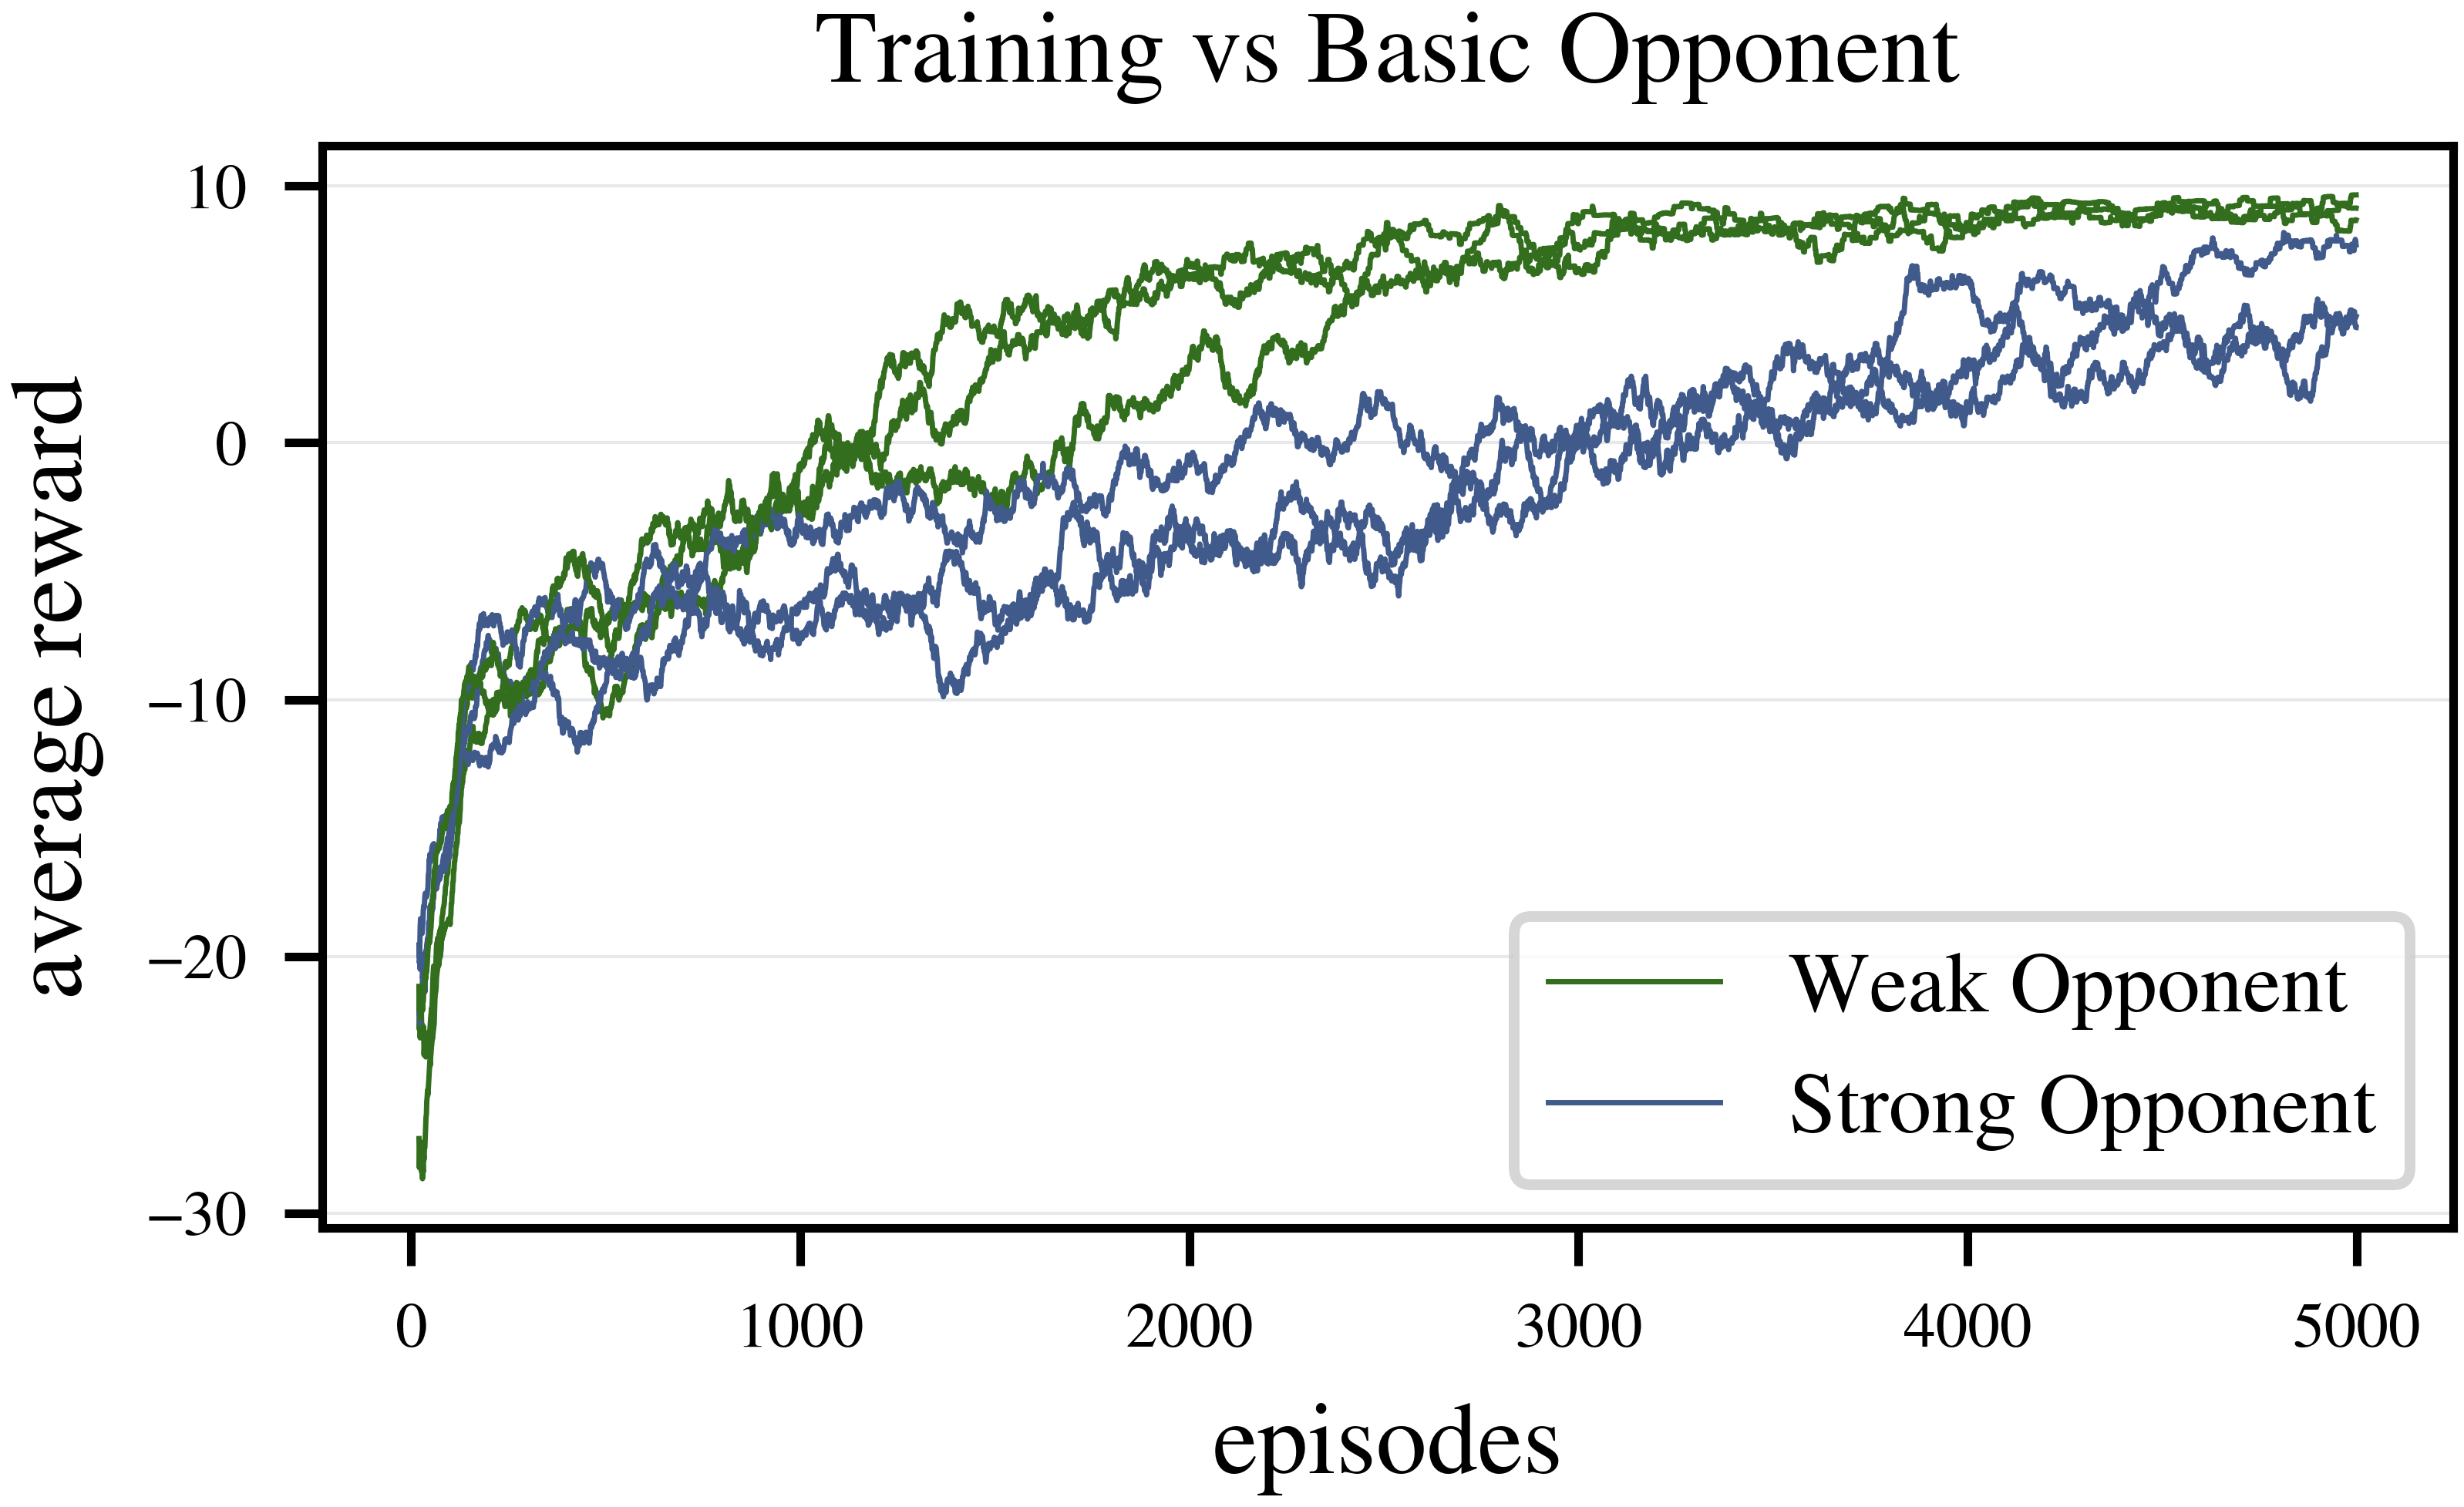

In [46]:
"""
config state:

alpha: 0.0003
beta: 0.0003
gamma: 0.99
n_actions: 4
max_size: 1000000
tau: 0.005
layer1_size: 256
layer2_size: 256
batch_size: 256
reward_scale: 2
checkpoint_dir: "SAC/SelfMade/tmp/checkpoints"
log_dir: "runs/hockey_sac_training"
n_games: 5000
resume_training: False
opponent_update_interval: 20
win_rate_threshold: 0.6

"""

paths = [
    'csv_data/training_log_basic_weak_bot1.csv',
    'csv_data/training_log_basic_weak_bot2.csv',
    'csv_data/training_log_basic_strong_bot1.csv',
    'csv_data/training_log_basic_strong_bot2.csv',
    'csv_data/training_log_basic_strong_bot3.csv',
    'csv_data/training_log_basic_weak_bot3.csv'
]


smoothing_window = 100
fig, ax = plt.subplots()


for path in paths:
    df = pd.read_csv(path)
    color = rgb.tue_darkblue if 'strong' in path else rgb.tue_darkgreen


    episodes = df['epsiode'][0:5000]
    rewards = df['reward'][0:5000]

    smoothed_rewards = rewards.rolling(window=smoothing_window, min_periods=1).mean()

    ax.plot(episodes[20:], smoothed_rewards[20:], ms=0.1, lw=0.5, color=color, zorder=3,
            label='Strong Opponent' if 'strong' in path else 'Weak Opponent')



#ax.set_ylim([0, 400])
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.grid(axis="y", which="major", color=rgb.tue_gray, alpha=0.3, linewidth=0.3, zorder=1)

#ax.set_xlim([years[0] - 0.5, years[-1] + 1])
#ax.set_xticks(episodes[1::2])
#ax.tick_params(axis='x', rotation=90)
#ax.tick_params(axis='both', labelsize=8, width=0.3, length=2)

ax.set_xlabel('episodes', fontsize=9.5)
ax.set_ylabel('average reward', fontsize=9.5)
ax.set_title('Training vs Basic Opponent', fontsize=9.5)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=8, loc='best')

plt.show()
fig.savefig('fig_SAC_TrainingVsOpponent.pdf')

In [ ]:

path = 'csv_data/league/training_log.csv',
    
smoothing_window = 100
fig, ax = plt.subplots()


df = pd.read_csv(path)


for path in paths:
    df = pd.read_csv(path)
    color = rgb.tue_darkblue if 'strong' in path else rgb.tue_darkgreen


    episodes = df['epsiode'][0:5000]
    rewards = df['reward'][0:5000]

    smoothed_rewards = rewards.rolling(window=smoothing_window, min_periods=1).mean()

    ax.plot(episodes[20:], smoothed_rewards[20:], ms=0.1, lw=0.5, color=color, zorder=3,
            label='Strong Opponent' if 'strong' in path else 'Weak Opponent')



#ax.set_ylim([0, 400])
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.grid(axis="y", which="major", color=rgb.tue_gray, alpha=0.3, linewidth=0.3, zorder=1)

#ax.set_xlim([years[0] - 0.5, years[-1] + 1])
#ax.set_xticks(episodes[1::2])
#ax.tick_params(axis='x', rotation=90)
#ax.tick_params(axis='both', labelsize=8, width=0.3, length=2)

ax.set_xlabel('episodes', fontsize=9.5)
ax.set_ylabel('average reward', fontsize=9.5)
ax.set_title('Training vs Basic Opponent', fontsize=9.5)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=8, loc='best')

plt.show()
fig.savefig('fig_SAC_TrainingVsOpponent.pdf')